In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns

In [3]:
train_dataset = pd.read_csv("train.csv")

In [4]:
test_dataset = pd.read_csv("test.csv")

###  Exploratory data analysis

In [12]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [58]:
train_dataset.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

In [20]:
# check the missing data
train_dataset.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

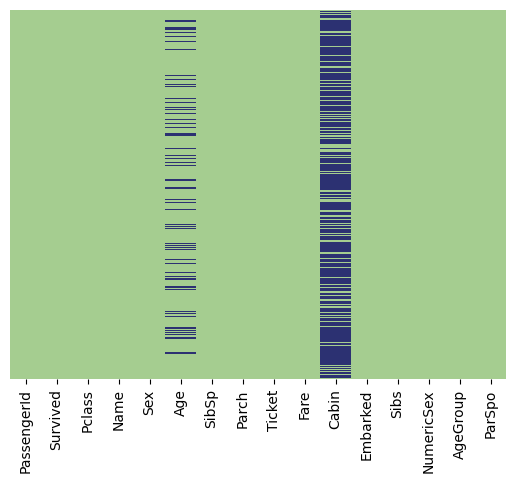

In [156]:
sns.heatmap(train_dataset.isnull(),yticklabels=False, cbar=False, cmap = "crest")

<Axes: xlabel='Survived', ylabel='count'>

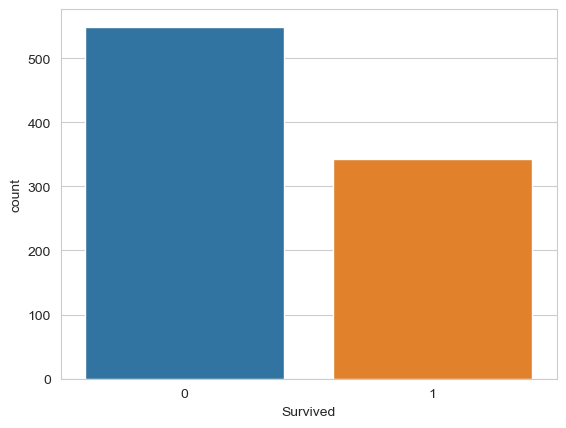

In [23]:
sns.set_style("whitegrid")
sns.countplot(x='Survived', data=train_dataset)

<Axes: xlabel='Survived', ylabel='count'>

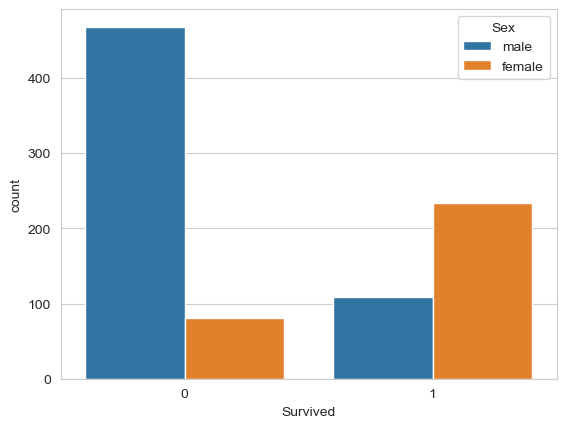

In [25]:
sns.set_style("whitegrid")
sns.countplot(x='Survived', hue='Sex', data=train_dataset)

<Axes: xlabel='Survived', ylabel='count'>

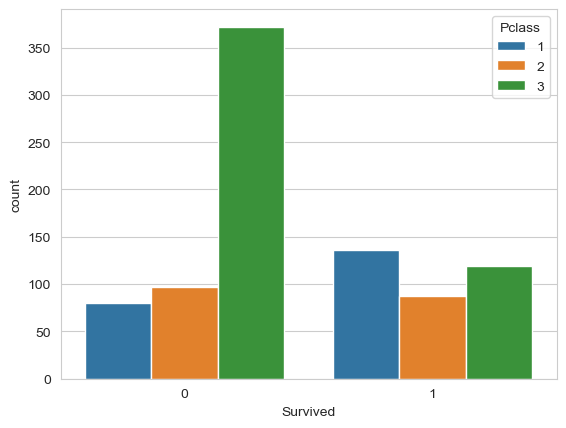

In [26]:
sns.set_style("whitegrid")
sns.countplot(x='Survived', hue = 'Pclass',data=train_dataset)

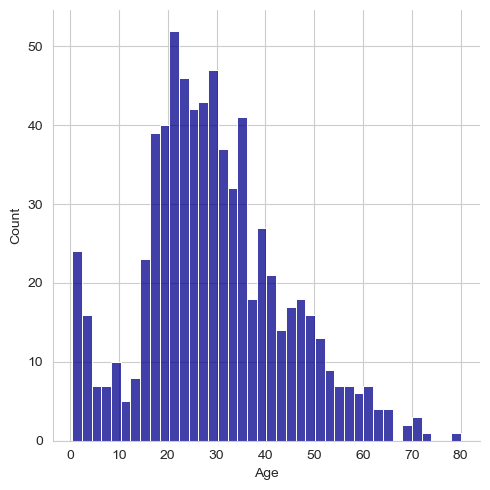

In [27]:
sns.displot(train_dataset['Age'].dropna(), kde=False, color = 'darkblue',bins=40)

In [28]:
train_dataset.corr()

C:\Users\Gavi\AppData\Local\Temp\ipykernel_10376\2043526507.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_dataset.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


There are otherer parameters we can use as well but we may not sure that if they will help or no.
We are changing categorical variable into numerical variable

In [95]:
train_dataset["NumericSex"]=0

In [96]:
def get_numeric_sex(sex):
    if sex == "male":
        return 0;
    else:
        return 1;

In [97]:
train_dataset["NumericSex"]=train_dataset["Sex"].apply(get_numeric_sex)

In [98]:
train_dataset["NumericSex"]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: NumericSex, Length: 891, dtype: int64

In [99]:
def get_age_group(age):
    if age < 10:
        return 0;
    elif age < 20:
        return 1;
    elif age < 30:
        return 2;
    elif age < 40:
        return 3;
    elif age < 50:
        return 4;
    else:
        return 5;

In [100]:
train_dataset["AgeGroup"]=train_dataset["Age"].apply(get_age_group)

In [101]:
train_dataset["AgeGroup"]

0      2
1      3
2      2
3      3
4      3
      ..
886    2
887    1
888    5
889    2
890    3
Name: AgeGroup, Length: 891, dtype: int64

In [102]:
train_dataset["Sibs"]=0

In [13]:
def get_sibsp(sibsp):
    if sibsp == 0:
        return 0;
    else:
        return 1;

In [103]:
train_dataset["Sibs"]=train_dataset["SibSp"].apply(get_sibsp)

In [104]:
train_dataset["Sibs"]

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    1
889    0
890    0
Name: Sibs, Length: 891, dtype: int64

In [105]:
def get_parch(parents_spouse):
    if parents_spouse == 0:
        return 0;
    else:
        return 1;

In [106]:
train_dataset["ParSpo"]=train_dataset["Parch"].apply(get_parch)

In [107]:
train_dataset.corr()

C:\Users\Gavi\AppData\Local\Temp\ipykernel_952\2043526507.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_dataset.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sibs,NumericSex,AgeGroup,ParSpo
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.053397,-0.042939,0.013932,0.005167
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.115867,0.543351,-0.106369,0.147408
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.076009,-0.131900,-0.137018,-0.027526
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.162893,-0.093254,0.968486,-0.280626
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.695562,0.114631,-0.171337,0.462241
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.356133,0.245489,-0.223674,0.845092
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.192190,0.182333,0.005290,0.237717
Sibs,-0.053397,0.115867,-0.076009,-0.162893,0.695562,0.356133,0.192190,1.000000,0.203203,-0.179341,0.420233
NumericSex,-0.042939,0.543351,-0.131900,-0.093254,0.114631,0.245489,0.182333,0.203203,1.000000,-0.093000,0.247523
AgeGroup,0.013932,-0.106369,-0.137018,0.968486,-0.171337,-0.223674,0.005290,-0.179341,-0.093000,1.000000,-0.298591


Now taking all the parameters with highest correlation with the target variable.

In [86]:
X = train_dataset[["Pclass","Fare","NumericSex","AgeGroup","Sibs","ParSpo"]]
X

,Pclass,Fare,NumericSex,AgeGroup,Sibs,ParSpo
0,3,7.2500,0,2,1,0
1,1,71.2833,1,3,1,0
2,3,7.9250,1,2,0,0
3,1,53.1000,1,3,1,0
4,3,8.0500,0,3,0,0
...,...,...,...,...,...,...
886,2,13.0000,0,2,0,0
887,1,30.0000,1,1,0,0
888,3,23.4500,1,5,1,1
889,1,30.0000,0,2,0,0


In [50]:
y = train_dataset["Survived"]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

Splitting the dataset into training and testing.

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [110]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [112]:
accuracy = model.score(X_test, y_test)
accuracy

0.8268156424581006

In [113]:
# doing it by logistic regression.
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [115]:
accuracy = lr.score(X_test, y_test)
accuracy

0.7653631284916201

In [116]:
# working on Test dataset.

In [117]:
test_dataset["NumericSex"]=test_dataset["Sex"].apply(get_numeric_sex)

In [118]:
test_dataset["ParSpo"]=test_dataset["Parch"].apply(get_parch)

In [119]:
test_dataset["AgeGroup"]=test_dataset["Age"].apply(get_age_group)

In [120]:
test_dataset["Sibs"]=test_dataset["SibSp"].apply(get_sibsp)

In [121]:
test_dataset.corr()

C:\Users\Gavi\AppData\Local\Temp\ipykernel_952\288847439.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  test_dataset.corr()


,PassengerId,Pclass,Age,SibSp,Parch,Fare,NumericSex,ParSpo,AgeGroup,Sibs
PassengerId,1.000000,-0.026751,-0.034102,0.003818,0.043080,0.008211,-0.023245,0.058410,-0.012968,-0.007059
Pclass,-0.026751,1.000000,-0.492143,0.001087,0.018721,-0.577147,-0.108615,-0.054258,-0.153319,-0.145113
Age,-0.034102,-0.492143,1.000000,-0.091587,-0.061249,0.337932,-0.000013,-0.151176,0.969685,0.037853
SibSp,0.003818,0.001087,-0.091587,1.000000,0.306895,0.171539,0.099943,0.396306,-0.115209,0.723162
Parch,0.043080,0.018721,-0.061249,0.306895,1.000000,0.230046,0.159120,0.743083,-0.044823,0.323763
Fare,0.008211,-0.577147,0.337932,0.171539,0.230046,1.000000,0.191514,0.256861,0.108942,0.249520
NumericSex,-0.023245,-0.108615,-0.000013,0.099943,0.159120,0.191514,1.000000,0.224158,-0.066624,0.158564
ParSpo,0.058410,-0.054258,-0.151176,0.396306,0.743083,0.256861,0.224158,1.000000,-0.208869,0.412240
AgeGroup,-0.012968,-0.153319,0.969685,-0.115209,-0.044823,0.108942,-0.066624,-0.208869,1.000000,-0.071924
Sibs,-0.007059,-0.145113,0.037853,0.723162,0.323763,0.249520,0.158564,0.412240,-0.071924,1.000000


In [136]:
X_test = test_dataset[["Pclass","Fare","NumericSex","AgeGroup","Sibs","ParSpo"]]

In [137]:
mean_value = X_test["Fare"].mean()

In [138]:
X_test["Fare"].fillna(value = mean_value, inplace=True)

C:\Users\Gavi\AppData\Local\Temp\ipykernel_952\2241388223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["Fare"].fillna(value = mean_value, inplace=True)


In [139]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Fare        418 non-null    float64
 2   NumericSex  418 non-null    int64  
 3   AgeGroup    418 non-null    int64  
 4   Sibs        418 non-null    int64  
 5   ParSpo      418 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 19.7 KB


In [140]:
predict_test = model.predict(X_test)

In [141]:
predict_test

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [147]:
pre_lr = lr. predict(X_test)
pre_lr

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [143]:
submission = test_dataset[["PassengerId"]]

In [144]:
submission["Survived"] = predict_test

C:\Users\Gavi\AppData\Local\Temp\ipykernel_952\3713592723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission["Survived"] = predict_test


In [145]:
submission.head()

,PassengerId,Survived
0,892,1
1,893,0
2,894,0
3,895,0
4,896,0
